In [1]:
 from google.colab import drive
 drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!pip3 install -q torch torchvision
!pip3 install -q Pillow
import os
import json
import os
import csv
import urllib
from io import BytesIO
from PIL import Image
from socket import timeout
from google.colab import files
import torch
from torchvision import models
from torch.utils.data import Dataset, SubsetRandomSampler
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import torch.nn as nn
import torch.optim as optim

import sklearn.metrics as metrics

In [4]:
# Download train data
!wget "https://storage.googleapis.com/dlcourse_ai/train.zip"
!unzip -q "train.zip"

# Download test data
!wget "https://storage.googleapis.com/dlcourse_ai/test.zip"
!unzip -q "test.zip"

--2020-05-20 07:44:04--  https://storage.googleapis.com/dlcourse_ai/train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 562348083 (536M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>] 536.30M   121MB/s    in 4.4s    

2020-05-20 07:44:09 (121 MB/s) - ‘train.zip’ saved [562348083/562348083]

--2020-05-20 07:44:17--  https://storage.googleapis.com/dlcourse_ai/test.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 140788786 (134M) [application/zip]
Saving to: ‘test.zip’

test.zip            100%[===================>] 134.27M   141MB/s    i

In [0]:
train_folder = '/content/train_kaggle/'
test_folder = '/content/test_kaggle/'

In [0]:
class HotdogOrNotDataset(Dataset):
    def __init__(self, folder, transform=None):
        self.transform = transform
        self.folder = folder
        self.files = [f for f in os.listdir(self.folder) if os.path.isfile(os.path.join(self.folder, f))]
        
    def __len__(self):
        return len(self.files)
    
    def __getitem__(self, index):
        # create reading image file
        if torch.is_tensor(index):
            index = index.tolist()

        img_name = os.path.join(self.folder + self.files[index])
        
        img = Image.open(img_name)

        if self.transform:
            img = self.transform(img)

        prefix = self.files[index].split('_')[0]
        if prefix in ['frankfurter', 'chili-dog', 'hotdog']:
            y = 1
        else:
            y = 0

        img_id = self.files[index]
        return img, y, img_id

In [0]:
def create_dataset(folder):
    dataset = HotdogOrNotDataset(folder, 
                          transform=transforms.Compose([
                              transforms.Resize((224, 224)),
                              transforms.ToTensor(),
                              # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])                         
                          ])
                          )
    
    return dataset

In [0]:
def visualize_samples(dataset, count=5):     
    display_indices = list(range(count))

    plt.figure(figsize=(20, 4))   

    for i, index in enumerate(display_indices):    
        x, y, _ = dataset[index]
        plt.subplot(1, count, i + 1)
        plt.title("Label: %s" % y)
        plt.imshow(x.permute(1, 2, 0))
        plt.grid(False)
        plt.axis('off')

In [0]:
train_dataset = create_dataset(train_folder)

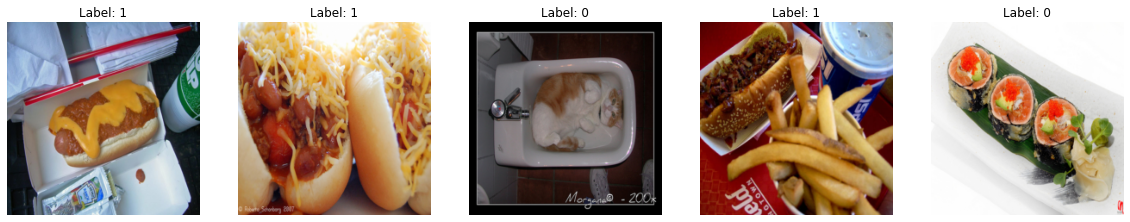

In [36]:
visualize_samples(train_dataset)

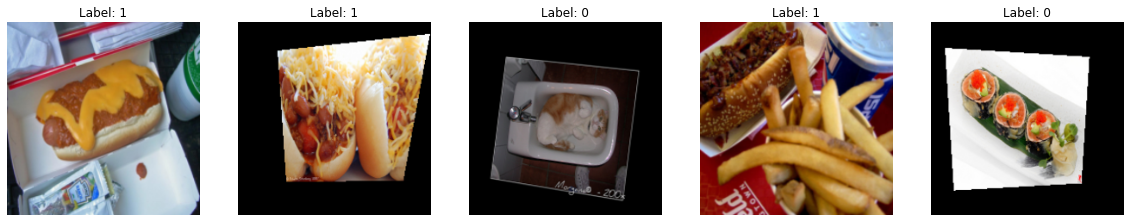

In [46]:
def create_aug_dataset(folder):
    dataset = HotdogOrNotDataset(folder, 
                          transform=transforms.Compose([
                              transforms.Resize((224, 224)),
                              transforms.RandomPerspective(),
                              
                              transforms.RandomResizedCrop((224, 224), scale=(0.75, 0.95), ratio=(0.75, 1.25)),
                              transforms.ToTensor(),
                              # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])                         
                          ])
                          )
    
    return dataset

aug_dataset = create_aug_dataset(train_folder)

visualize_samples(aug_dataset)